
## INTRODUCTION

### About Dataset
#### Context
This dataset is a collection of basic but crucial stats of the English Premier League 2020-21 season. The dataset has all the players that played in the EPL and their standard stats such as Goals, Assists, xG, xA, Passes Attempted, Pass Accuracy and more.

### Content
| Attribute | Description |
|-----------|-------------|
| Position | Each player has a certain position, in which he plays regularly. The position in this dataset are, FW - Forward, MF - Midfield, DF - Defensive, GK - Goalkeeper |
| Starts | The number of times the player was named in the starting 11 by the manager. |
| Mins | The number of minutes played by the player. |
| Goals | The number of Goals scored by the player. |
| Assists | The number of times the player has assisted other player in scoring the goal. |
| Passes_Attempted | The number of passes attempted by the player. |
| PercPassesCompleted | The number of passes that the player accurately passed to his teammate. |
| xG | Expected number of goals from the player in a match. |
| xA | Expected number of assists from the player in a match. |
| Yellow_Cards | The players get a yellow card from the referee for indiscipline, technical fouls, or other minor fouls. |
| Red Card | The players get a red card for accumulating 2 yellow cards in a single game, or for a major foul. |

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

In [3]:
# Load the dataset
df = pd.read_csv('EPL_20_21.csv')
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [4]:
# Load the dataset
df = pd.read_csv('EPL_20_21.csv')
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [6]:
# change column names to lower case
df.columns = df.columns.str.lower()

In [7]:
#create non penalty goals column
df['non_penalty_goals'] = (df['goals']-df['penalty_goals']).astype(int)
# create goal per game column
df['goals_per_game'] = df['goals']/df['matches']
# create column mins per match
df['mins_per_game'] = (df['mins']/df['matches']).astype(int)

In [8]:
total_goals = df['goals'].sum()

### TOTAL GOALS SCORED IN THE LEAGUE SEASON

In [9]:
total_goals

986

 > A total of 986 goals was scored in the league season

In [10]:
# number of penalty goals
total_penalty_scored = df['penalty_goals'].sum()

### TOTAL PENALTIES CONVERTED

In [11]:
total_penalty_scored

102

> Out of the total goals scored , penalties accounted for 102 of those goals .

### TOTAL PENALTIES AWARDED

In [12]:
# Total number of penalties awarded for the season
total_penalties_awarded = df['penalty_attempted'].sum()

In [13]:
total_penalties_awarded

125

> A total of 125 penalties were awarded in the league season.

In [15]:
# number of missed penalties
total_penalty_missed = total_penalties_awarded - total_penalty_scored
total_penalty_missed

23

### TOTAL NUMBER OF PENALTIES MISSED

In [17]:
total_penalty_missed

23

> 23 penalties awarded were missed in the league season

### PENALTIES CONVERTED VS PENALTIES MISSED

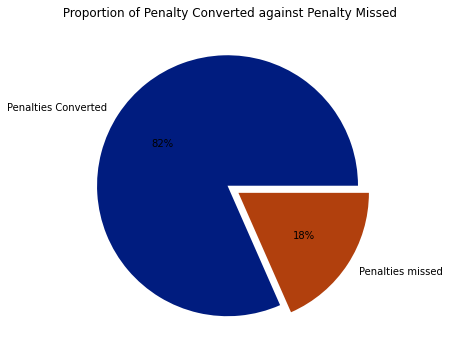

In [31]:
# create a pie chart showing the proportion of penalty missed and penalty scored
plt.figure(figsize = (13,6))
data = [total_penalty_scored, total_penalty_missed]
plt.title(' Proportion of Penalty Converted against Penalty Missed')
keys = ['Penalties Converted', 'Penalties missed']
explode = [0, 0.1]
color = sns.color_palette('dark')
plt.pie(data, labels = keys , colors = color , explode = explode, autopct = '%.0f%%');

> - Penalty conversion rate stood at 82%, with only 18% of takers missing their spotkick.

### TOP 10 HIGHEST SCORING TEAMS IN THE LEAGUE

In [20]:
# which team scored the most goals
goals_scoredby_teams = df.groupby('club')['goals'].sum().sort_values(ascending = False)

In [21]:
#Top 10 highest scoring teams
top_scoring_teams = goals_scoredby_teams.nlargest(n = 10)
top_scoring_teams

club
Manchester City      82
Manchester United    70
Tottenham Hotspur    66
Liverpool FC         65
Leicester City       64
Leeds United         60
West Ham United      60
Chelsea              56
Arsenal              53
Aston Villa          52
Name: goals, dtype: int64

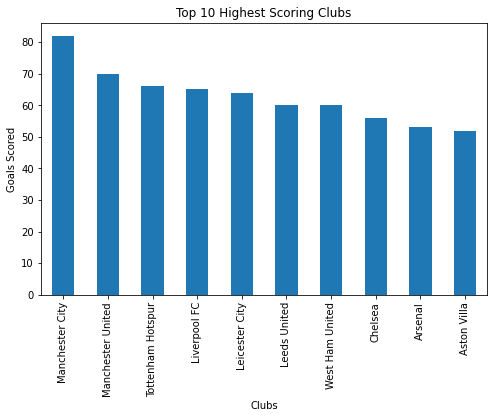

In [22]:
top_scoring_teams.plot(kind = 'bar', figsize = (8,5))
plt.title('Top 10 Highest Scoring Clubs', fontweih)
plt.xlabel('Clubs')
plt.ylabel('Goals Scored');

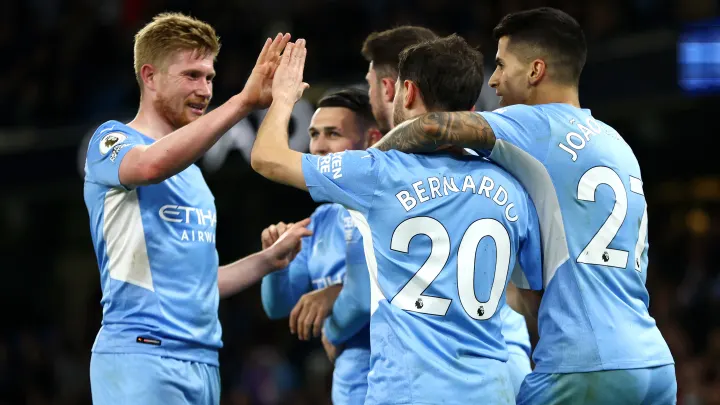
> - Manchester city scored the most goals for the season, scoring 82 goals for the season.
> - Manchester united scored the second most goals in the season scoring 70 goals
> - Tottenham hotspur , liverpool and leicester city completed the top 5 scoring teams in the league. 

### LEAST SCORING TEAMS IN THE LEAGUE

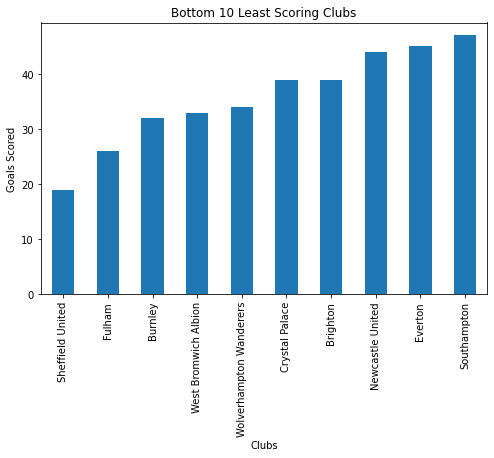

In [23]:
# Bottom 10 least scoring teams in the league
least_scoring_teams = goals_scoredby_teams.nsmallest(n = 10)
least_scoring_teams.plot(kind = 'bar', figsize = (8,5))
plt.title('Bottom 10 Least Scoring Clubs')
plt.xlabel('Clubs')
plt.ylabel('Goals Scored');

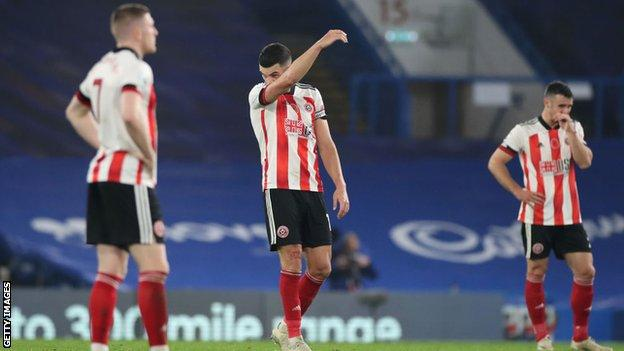
> Sheffield united , Fulham and Burnley were the three least scoring sides in the league, with Sheffield united scoring the least number of goals, scoring 19 goals in 38 matches.

### AGE DISTRIBUTION OF PLAYERS IN THE LEAGUE

In [27]:
# distribution of players based on ages
# create class
under_20 = df[df['age']< 20]
ages_20_24 = df[(df['age']>= 20) & (df['age'] < 25)]
ages_25_29 = df[(df['age'] >= 25) & (df['age'] < 30)]
ages_30_and_over = df[df['age'] >= 30]

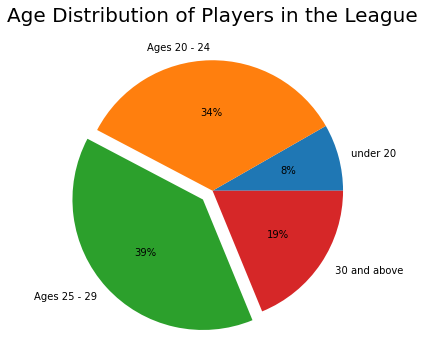

In [30]:
plt.figure(figsize = (13, 6))
x = np.array([under_20['name'].count(), ages_20_24['name'].count(), ages_25_29['name'].count(), ages_30_and_over['name'].count()])
keys = ['under 20', 'Ages 20 - 24', 'Ages 25 - 29', ' 30 and above']
plt.title('Age Distribution of Players in the League', fontsize = 20)
explode = [0,0,0.1,0]
color = sns.color_palette('dark')
plt.pie(x, labels = keys,explode = explode, autopct = '%.0f%%');

> Players between the ages of 25 to 29 account for the highest age group distribution within the league.
 with players from 20 to 29 accounting for almost 75% of the total players in the league.

### AVERAGE AGE OF PLAYERS BY FOOTBALL CLUBS

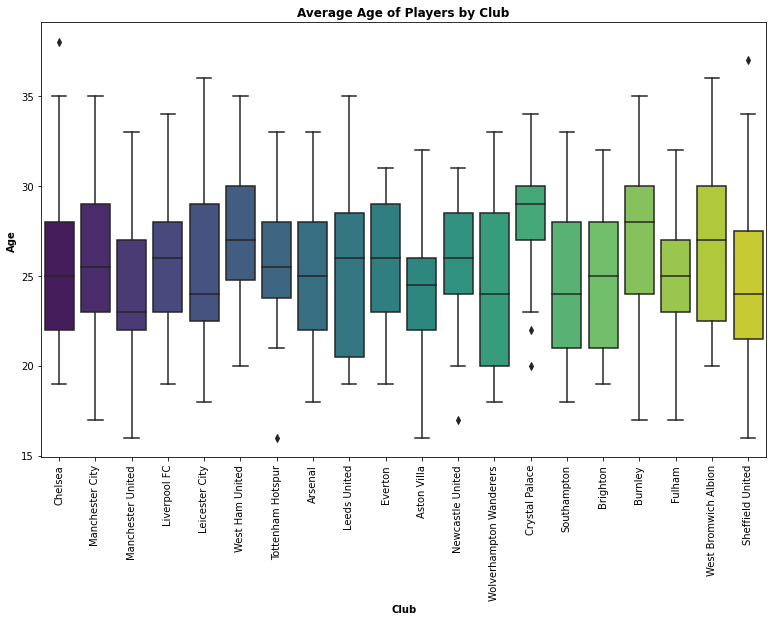

In [26]:
# average of each club
plt.figure(figsize = (13,8))
sns.boxplot(data = df ,x = 'club', y = 'age',palette = 'viridis')
plt.title('Average Age of Players by Club', fontweight = 'bold')
plt.xlabel('Club', fontweight = 'bold')
plt.ylabel('Age', fontweight = 'bold')
plt.xticks(rotation = 90);


> Visualizing the average ages of players in each club, showed that manchester united had the youngest squad with an average age of 23 whilst crystal palace had the oldest squad with an average age of 28.

### TOP GOAL SCORERS

In [41]:
# top 10 goal scorers
df[['name','club','goals','matches']].nlargest(n=10, columns = 'goals').reset_index()

,index,name,club,goals,matches
0,162,Harry Kane,Tottenham Hotspur,23,35
1,81,Mohamed Salah,Liverpool FC,22,37
2,51,Bruno Fernandes,Manchester United,18,37
3,161,Son Heung-min,Tottenham Hotspur,17,37
4,214,Patrick Bamford,Leeds United,17,38
5,237,Dominic Calvert-Lewin,Everton,16,33
6,110,Jamie Vardy,Leicester City,15,34
7,267,Ollie Watkins,Aston Villa,14,37
8,33,İlkay Gündoğan,Manchester City,13,28
9,191,Alexandre Lacazette,Arsenal,13,31


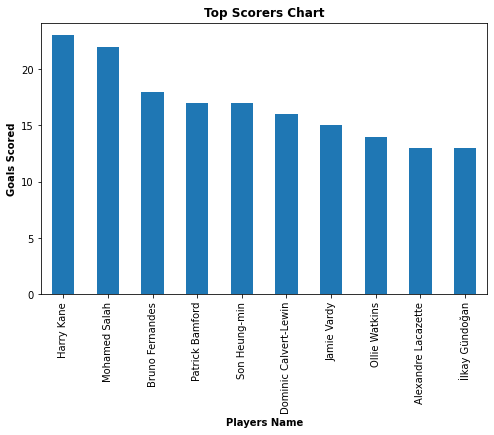

In [42]:
top_scorers = df.groupby('name')['goals'].sum().nlargest(n = 10)
top_scorers
top_scorers.plot(kind = 'bar', figsize = (8,5))
plt.title('Top Scorers Chart', fontweight = 'bold')
plt.xlabel('Players Name', fontweight = 'bold')
plt.ylabel('Goals Scored', fontweight = 'bold');

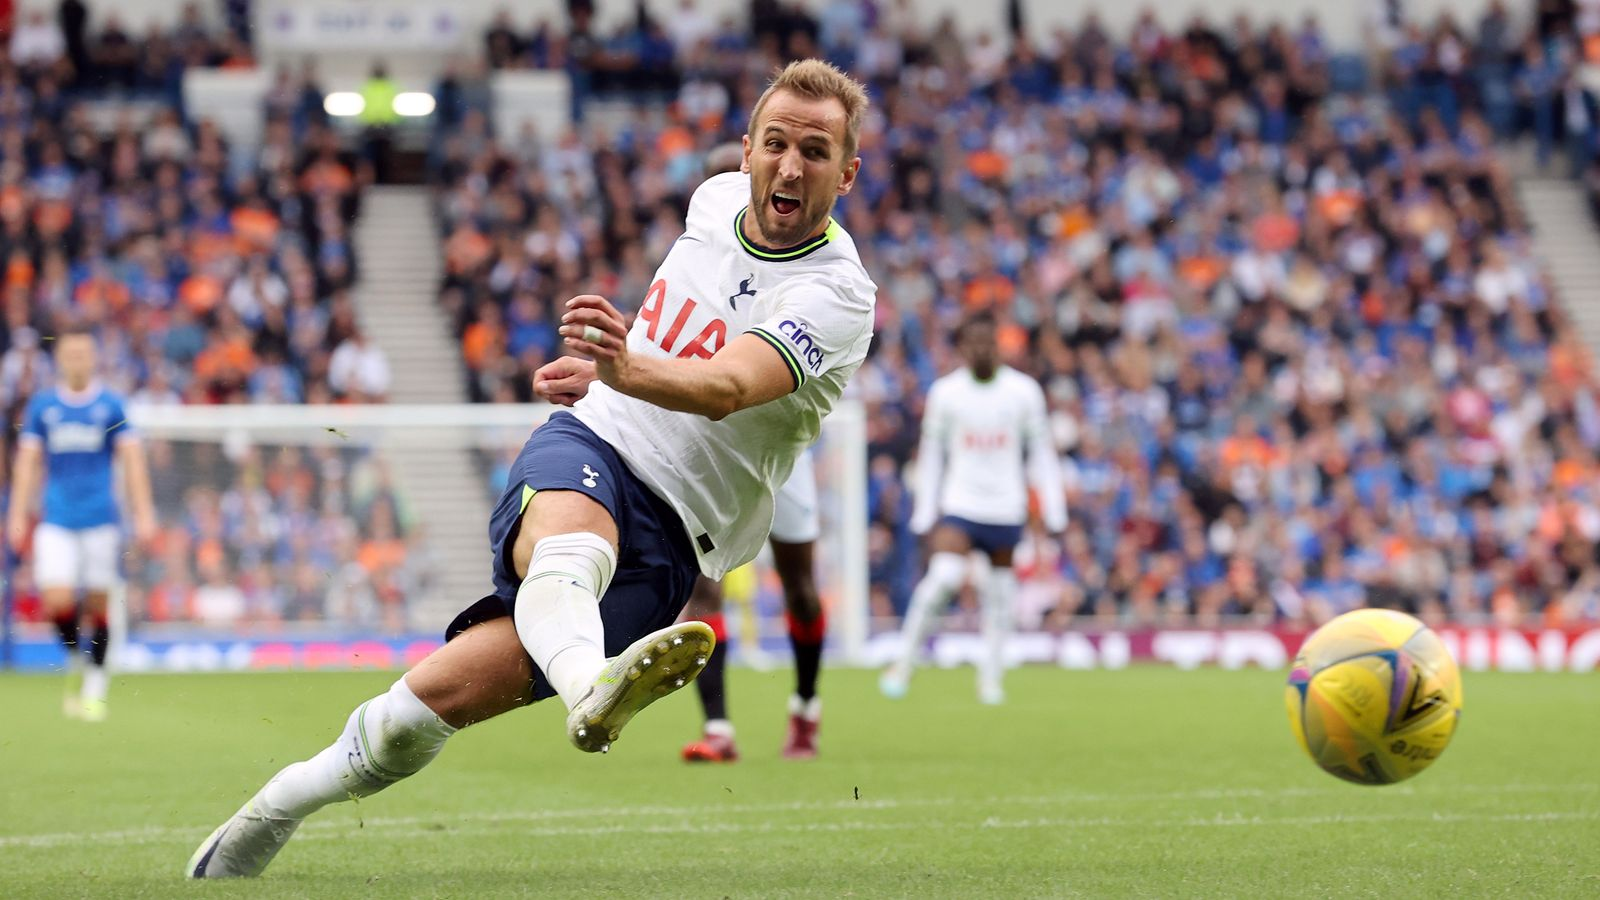
> Harry of Tottenham Hotspur scored the most number of goals in the league with a tally of 23 goals in 35 matches, with mohammed salah of salah being short of kane's tally by a single goal, though he played more matches, having played 2 more games more than kane.

### TOP GOAL ASSISTERS

In [44]:
# players with the most assists
df[['name','club','assists','matches']].nlargest(n=10, columns = 'assists').reset_index()

,index,name,club,assists,matches
0,162,Harry Kane,Tottenham Hotspur,14,35
1,34,Kevin De Bruyne,Manchester City,12,25
2,51,Bruno Fernandes,Manchester United,12,37
3,161,Son Heung-min,Tottenham Hotspur,10,37
4,273,Jack Grealish,Aston Villa,10,26
5,54,Marcus Rashford,Manchester United,9,37
6,110,Jamie Vardy,Leicester City,9,34
7,220,Raphael Dias Belloli,Leeds United,9,30
8,2,Timo Werner,Chelsea,8,35
9,136,Aaron Cresswell,West Ham United,8,36


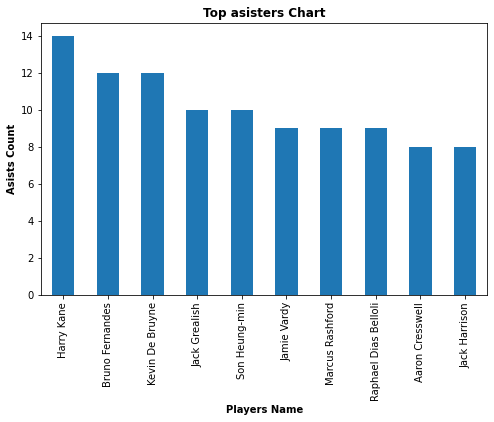

In [45]:
top_assisters = df.groupby('name')['assists'].sum().nlargest(n = 10)
top_assisters.plot(kind = 'bar', figsize = (8,5))
plt.title('Top asisters Chart', fontweight = 'bold')
plt.xlabel('Players Name', fontweight = 'bold')
plt.ylabel('Asists Count', fontweight = 'bold');

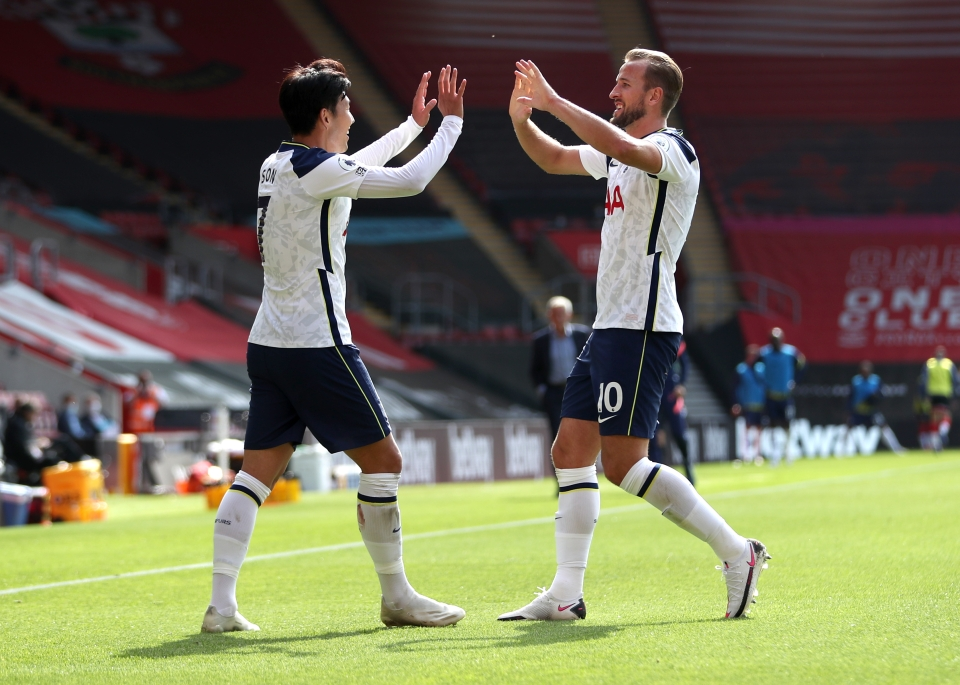
> Not only did Harry Kane score the most goals in the league season, he also assisted the most goals with a tally of 14 goals, with kevin De bruyne of Manchester city coming closest with two assists shy of Kane's tally.

## THANK YOU FOR READING

In [48]:
!jupyter nbconvert MY_EPL_LEAGUE_PRESENTATION.ipynb --to slides --no-input --no-prompt

[NbConvertApp] Converting notebook MY_EPL_LEAGUE_PRESENTATION.ipynb to slides
[NbConvertApp] Writing 1629320 bytes to MY_EPL_LEAGUE_PRESENTATION.slides.html
